In [2]:
import pandas as pd
import numpy as np

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Task 1

In [3]:
from google.colab import files

uploaded = files.upload()

Saving daily-total-female-births.csv to daily-total-female-births (1).csv


In [5]:
data=pd.read_csv('mushrooms.csv')

In [6]:
num=10

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data.shape

(8124, 23)

In [13]:
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [120]:
X=data.drop("class",axis=1)
y=data[["class"]]

In [121]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [122]:
for i in X:
  X[i]=le.fit_transform(np.array(X[i]))

In [123]:
y=le.fit_transform(np.array(y))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=999)

In [126]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [127]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(22,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               11776     
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 275,458
Trainable params: 275,458
Non-trainable params: 0
_________________________________________________________________


In [128]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
69/69 - 1s - loss: 0.2910 - accuracy: 0.8797 - val_loss: 0.1099 - val_accuracy: 0.9614 - 1s/epoch - 17ms/step
Epoch 2/10
69/69 - 0s - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.1775 - val_accuracy: 0.9183 - 477ms/epoch - 7ms/step
Epoch 3/10
69/69 - 0s - loss: 0.0505 - accuracy: 0.9805 - val_loss: 0.0185 - val_accuracy: 0.9991 - 464ms/epoch - 7ms/step
Epoch 4/10
69/69 - 0s - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.0350 - val_accuracy: 0.9899 - 491ms/epoch - 7ms/step
Epoch 5/10
69/69 - 0s - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.0057 - val_accuracy: 0.9991 - 459ms/epoch - 7ms/step
Epoch 6/10
69/69 - 0s - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0124 - val_accuracy: 0.9954 - 483ms/epoch - 7ms/step
Epoch 7/10
69/69 - 0s - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0037 - val_accuracy: 1.0000 - 487ms/epoch - 7ms/step
Epoch 8/10
69/69 - 0s - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 1.0000 - 477ms/epoch - 7ms/step
Epoch 9/10
69/69 -

In [3]:
import matplotlib.pyplot as plt

In [130]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

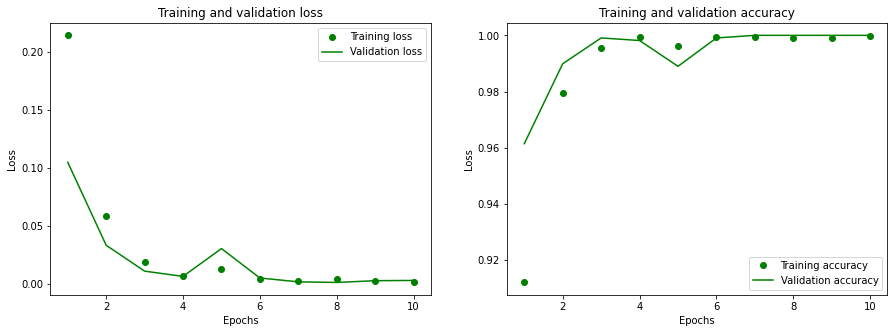

In [117]:
history_dict = history.history
accuracy = history_dict["accuracy"]
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, "bo", label="Training loss", c = "green")
plt.plot(epochs, val_loss_values, "b", label="Validation loss", c = "green")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, accuracy, "bo", label="Training accuracy", c = "green")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy", c = "green")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [132]:
score = model.evaluate(X_train, y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1])

Train score: 0.0009313020273111761
Train accuracy: 1.0


In [131]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0013693160144612193
Test accuracy: 1.0


Task 2




In [4]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


In [5]:
test_features.shape

(10000, 32, 32, 3)

In [6]:
np.unique(test_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [7]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

In [8]:
train_labels = keras.utils.to_categorical(train_labels, 100)
test_labels = keras.utils.to_categorical(test_labels, 100)

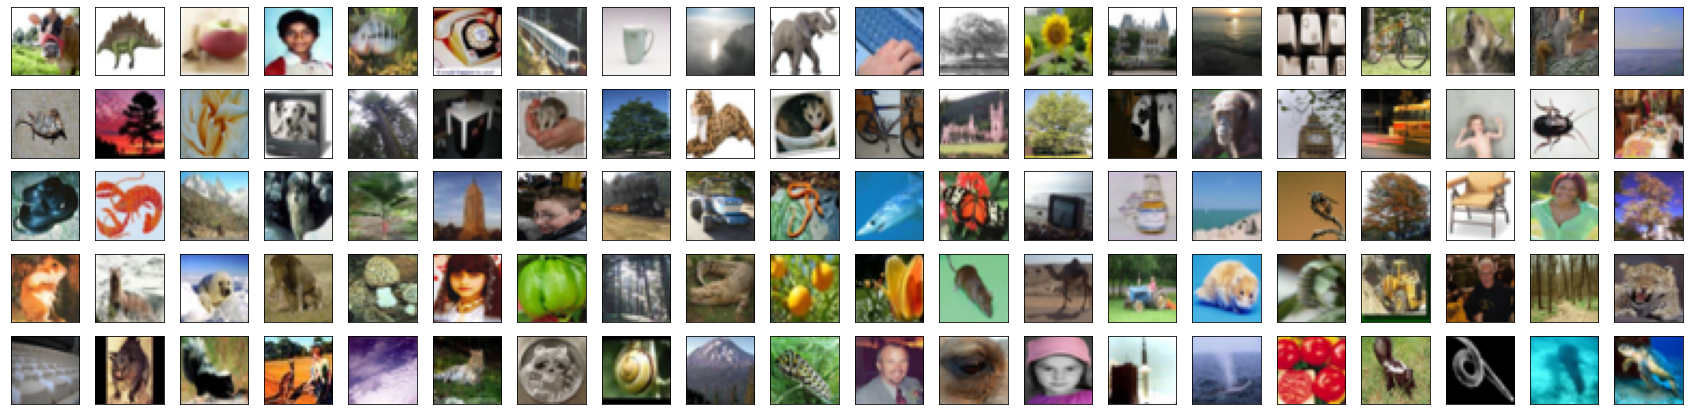

In [9]:
plt.figure(figsize=(30, 30))
for i in range(100):
    ax = plt.subplot(20, 20, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
alpha = 0.02

model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(train_features.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(256))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(100, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [14]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

model.fit(train_features, train_labels, validation_split=0.2, epochs=50, batch_size=50, callbacks = my_callbacks, verbose=1)

Epoch 1/50
800/800 [==============================] - 157s 195ms/step - loss: 4.1641 - accuracy: 0.0486 - val_loss: 3.8506 - val_accuracy: 0.0908
Epoch 2/50
800/800 [==============================] - 156s 195ms/step - loss: 3.5425 - accuracy: 0.1445 - val_loss: 3.3167 - val_accuracy: 0.1894
Epoch 3/50
800/800 [==============================] - 157s 197ms/step - loss: 3.0555 - accuracy: 0.2375 - val_loss: 2.9346 - val_accuracy: 0.2640
Epoch 4/50
800/800 [==============================] - 156s 195ms/step - loss: 2.6697 - accuracy: 0.3173 - val_loss: 2.7973 - val_accuracy: 0.3000
Epoch 5/50
800/800 [==============================] - 157s 196ms/step - loss: 2.3506 - accuracy: 0.3772 - val_loss: 2.6812 - val_accuracy: 0.3249
Epoch 6/50
800/800 [==============================] - 156s 195ms/step - loss: 2.0446 - accuracy: 0.4451 - val_loss: 2.5937 - val_accuracy: 0.3583
Epoch 7/50
800/800 [==============================] - 158s 198ms/step - loss: 1.7431 - accuracy: 0.5121 - val_loss: 2.7241 -

In [15]:
score = model.evaluate(test_features, test_labels, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 3.5754663944244385
Test accuracy: 0.36800000071525574


Task 3

In [6]:
data=pd.read_csv('daily-total-female-births.csv')

In [7]:
display(data)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

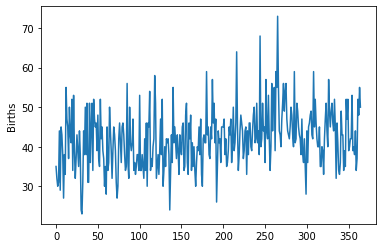

In [8]:
sns.lineplot(data=data,x=data.index,y="Births")

In [9]:
data.index

RangeIndex(start=0, stop=365, step=1)

In [10]:
data.size

730

In [11]:
len(data)

365

In [12]:
aa = np.arange(0,5)

In [108]:
create_dataset(aa)[1].shape

(3,)

In [13]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        x.append(a)
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [14]:
def train_part(x,dataframe,lol):
  a = int(x*len(dataframe))
  b = len(dataframe)-a
  y_train = np.array(dataframe[lol])[0:a]
  x_train = np.arange(0,a)
  y_test = np.array(dataframe[lol])[a:len(dataframe)]
  x_test = np.arange(a,len(dataframe))
  sns.lineplot(x=x_train,y=y_train)
  sns.lineplot(x=x_test,y=y_test,c='r')
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test=train_part(0.9,data,"Births")

In [110]:
len(x_train)

328

In [117]:
np.reshape(x_train,(328,1)).shape

(328, 1)

In [32]:
model =  keras.Sequential()
model.add(layers.LSTM(300, input_shape=(1,1), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 300)               362400    
                                                                 
 dense_6 (Dense)             (None, 1)                 301       
                                                                 
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(np.reshape(x_train,(328,1)), np.reshape(y_train,(328,1)), epochs=10, batch_size=32, verbose=2)

Epoch 1/10
11/11 - 0s - loss: 50.9178 - 123ms/epoch - 11ms/step
Epoch 2/10
11/11 - 0s - loss: 49.7011 - 120ms/epoch - 11ms/step
Epoch 3/10
11/11 - 0s - loss: 49.5548 - 125ms/epoch - 11ms/step
Epoch 4/10
11/11 - 0s - loss: 49.7923 - 123ms/epoch - 11ms/step
Epoch 5/10
11/11 - 0s - loss: 49.4876 - 121ms/epoch - 11ms/step
Epoch 6/10
11/11 - 0s - loss: 49.8174 - 128ms/epoch - 12ms/step
Epoch 7/10
11/11 - 0s - loss: 49.5822 - 128ms/epoch - 12ms/step
Epoch 8/10
11/11 - 0s - loss: 49.6487 - 121ms/epoch - 11ms/step
Epoch 9/10
11/11 - 0s - loss: 49.6012 - 130ms/epoch - 12ms/step
Epoch 10/10
11/11 - 0s - loss: 49.6043 - 121ms/epoch - 11ms/step


In [124]:
x_test.reshape(-1,1).shape

(37, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


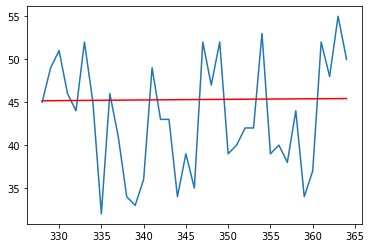

In [38]:
sns.lineplot(x=x_test,y=y_test)
sns.lineplot(x=x_test,y=model.predict(np.reshape(x_test,(37,1))).reshape(-1),c='r')

In [39]:
model.predict(np.reshape(x_test,(37,1))).reshape(-1)

array([45.16527 , 45.17357 , 45.181797, 45.18995 , 45.198044, 45.20606 ,
       45.21401 , 45.221886, 45.22971 , 45.237453, 45.245132, 45.252754,
       45.2603  , 45.267788, 45.275208, 45.282566, 45.289856, 45.297092,
       45.304264, 45.311367, 45.318417, 45.325397, 45.332325, 45.33919 ,
       45.346   , 45.35275 , 45.35944 , 45.36607 , 45.372643, 45.37916 ,
       45.385624, 45.392033, 45.39838 , 45.404675, 45.41092 , 45.417103,
       45.42324 ], dtype=float32)